In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data=pd.read_csv("D:\Analysis/Caste.csv")
data.head()

,state_name,is_state,year,gender,caste,convicts,under_trial,detenues,others
0,Andhra Pradesh,1,2001,Male,SC,1236,1836,0,5
1,Andhra Pradesh,1,2001,Male,ST,418,1205,0,1
2,Andhra Pradesh,1,2001,Male,OBC,1526,3359,4,8
3,Andhra Pradesh,1,2001,Male,Others,939,1960,0,8
4,Andhra Pradesh,1,2002,Male,SC,1177,1573,2,0


In [40]:
data['sortedothers']=data.groupby(['year','caste','gender'])['others'].transform('sum')
data['sortedconvicts']=data.groupby(['year','caste','gender'])['convicts'].transform('sum')
data['sortedunder_trial']=data.groupby(['year','caste','gender'])['under_trial'].transform('sum')
data['sorteddetenues']=data.groupby(['year','caste','gender'])['detenues'].transform('sum')
newdata = data[['year','caste','gender','sortedconvicts','sortedunder_trial','sorteddetenues','sortedothers']]
newdata = newdata.drop_duplicates(subset=['year','caste','gender'],keep="last")
newdata.head()

,year,caste,gender,sortedconvicts,sortedunder_trial,sorteddetenues,sortedothers
1596,2001,SC,Male,16608,53170,752,3902
1597,2001,ST,Male,10828,26764,320,642
1598,2001,OBC,Male,20843,59498,737,6265
1599,2001,Others,Male,22759,64600,966,1382
1600,2002,SC,Male,16598,47626,1238,4374


In [53]:
newdata['prisoners'] = newdata['sortedconvicts']+newdata['sortedunder_trial']+newdata['sorteddetenues']+newdata['sortedothers']
allprisoner = newdata[['year','caste','gender','prisoners']]
allprisoner.head()

,year,caste,gender,prisoners
1596,2001,SC,Male,74432
1597,2001,ST,Male,38554
1598,2001,OBC,Male,87343
1599,2001,Others,Male,89707
1600,2002,SC,Male,69836


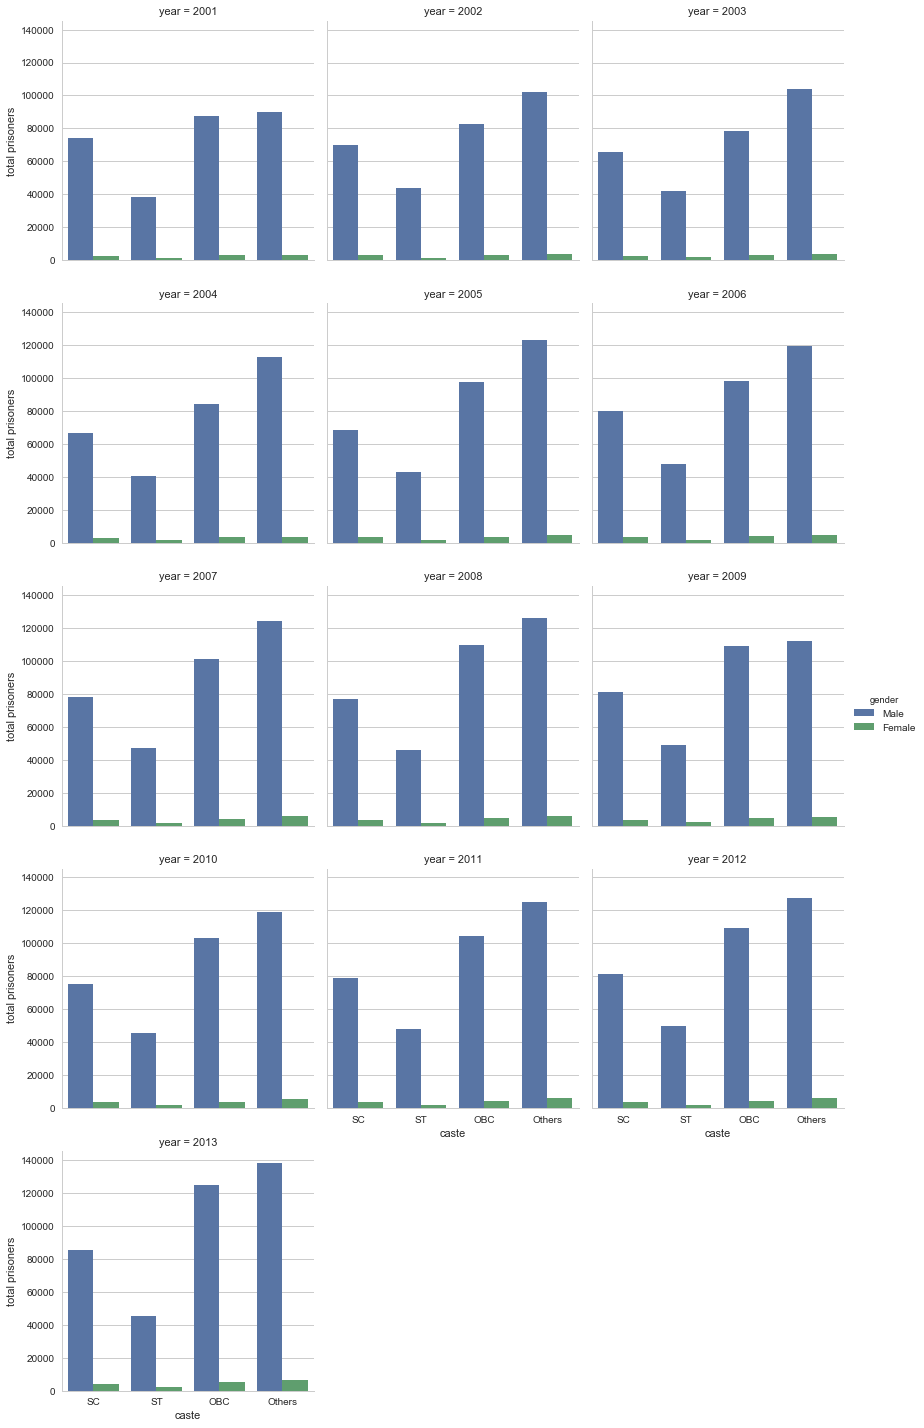

In [56]:
sns.set(style="whitegrid", color_codes=True)
graph = sns.factorplot(x='caste',y='prisoners',hue='gender',col='year',data=allprisoner,kind='bar',col_wrap=3)
graph.set_axis_labels("caste","total prisoners")
graph.despine()
plt.show()

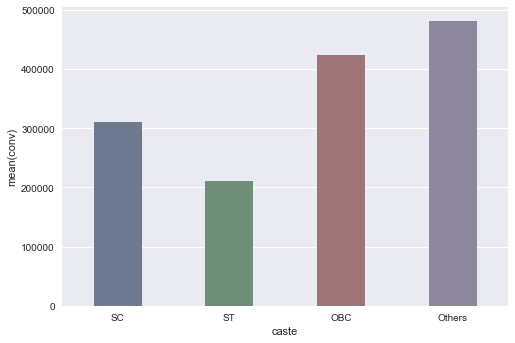

In [43]:
fig, ax = plt.subplots()
sns.set(style="whitegrid", color_codes=True)
data['conv']=data.groupby('caste')['convicts'].transform('sum')
sns.barplot(x='caste',y='conv',ax=ax, data=data,saturation=0.35)

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .43)
plt.show()

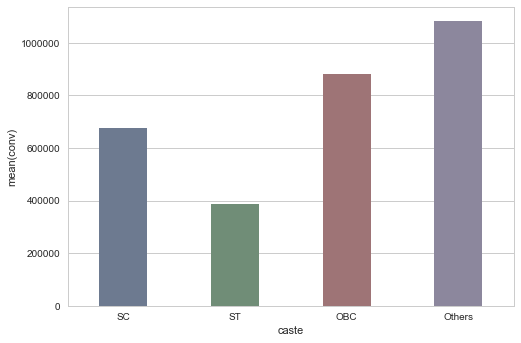

In [44]:
fig, ax = plt.subplots()
sns.set(style="whitegrid", color_codes=True)
data['conv']=data.groupby('caste')['under_trial'].transform('sum')
sns.barplot(x='caste',y='conv',ax=ax, data=data,saturation=0.35)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .43)
plt.show()

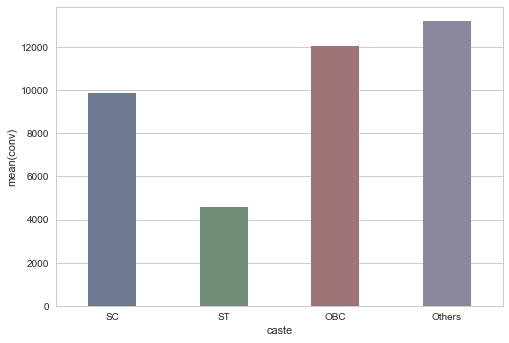

In [45]:
fig, ax = plt.subplots()
sns.set(style="whitegrid", color_codes=True)
data['conv']=data.groupby('caste')['detenues'].transform('sum')
sns.barplot(x='caste',y='conv', data=data,saturation=0.35)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .43)
plt.show()

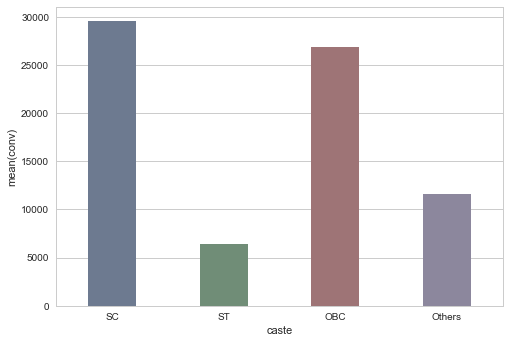

In [46]:
fig, ax = plt.subplots()
sns.set(style="whitegrid", color_codes=True)
data['conv']=data.groupby('caste')['others'].transform('sum')
sns.barplot(x='caste',y='conv', data=data,saturation=0.35)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .43)
plt.show()

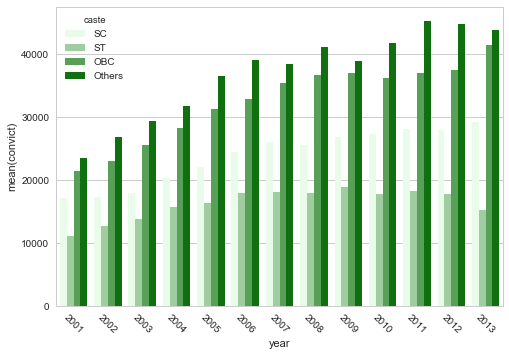

In [47]:
data['convict']=data.groupby(['year','caste'])['convicts'].transform('sum')
sns.barplot(x='year',y='convict',hue='caste', data=data , color ='green')
plt.xticks(rotation=-45)
plt.show()

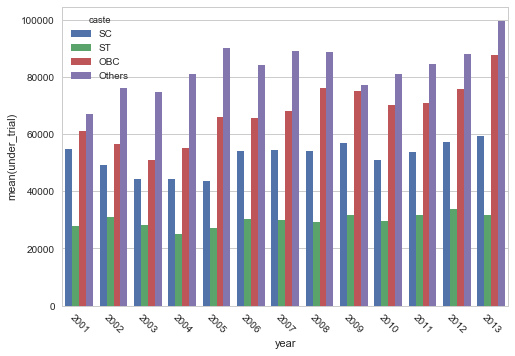

In [48]:
data['under_trial']=data.groupby(['year','caste'])['under_trial'].transform('sum')
sns.barplot(x='year',y='under_trial',hue='caste', data=data,saturation=0.88)
plt.xticks(rotation=-45)
plt.show()

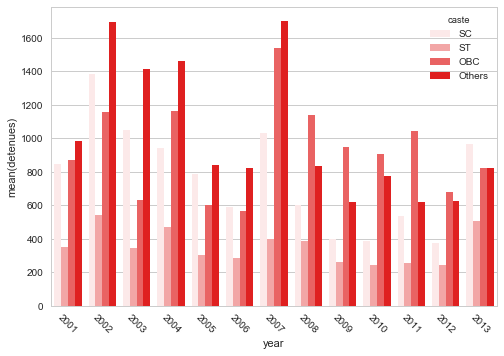

In [49]:
data['detenues']=data.groupby(['year','caste'])['detenues'].transform('sum')
sns.barplot(x='year',y='detenues',hue='caste', data=data, color ='red')
plt.xticks(rotation=-45)
plt.show()

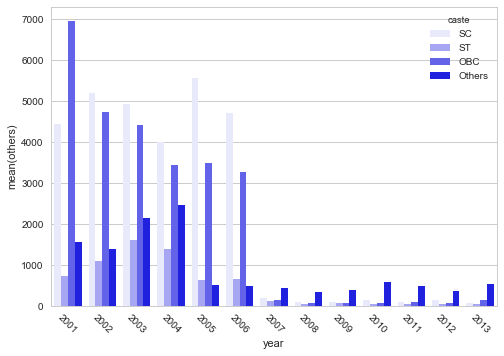

In [50]:
data['others']=data.groupby(['year','caste'])['others'].transform('sum')
sns.barplot(x='year',y='others',hue='caste', data=data,color='blue')
plt.xticks(rotation=-45)
plt.show()